<a href="https://colab.research.google.com/github/rchang18/MAT-241/blob/main/Module_B_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.4 Lagrange Polynomial Interpolation

Lagrange polynomial interpolation is used to find a single polynomial that goes through a set of data points. A common way to write the solution for these is by using a linear combination of Lagrange basis polynomials in the form:

 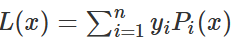

The equation for solving for each polynomial is the following:

 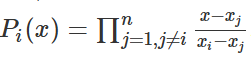


Let's do an example. Assuming we have a set of data points such that x = [ 0 3 5] and y = [0 4 6], we can use the above equations to find the Lagrange polynomial.

P1 would be equal to [(x-3)(x-5)]/[(0-3)(0-5)] which is (1/15)*(x^2-8x+15)

P2 would be equal to [(x-0)(x-5)]/[(3-0)(3-5)] which is (-1/6)*(x^2-5x)

P3 would be equal to [(x-0)(x-3)]/[(5-0)(5-3)] which is (1/10)*(x^2-3x)

Using the basis polynomials, the entire polynomial will look something like this:
L(x) = (-2/3)*(x^2-5x) + (3/5)*(x^2-3x)


We can compare these manual calculations to python's

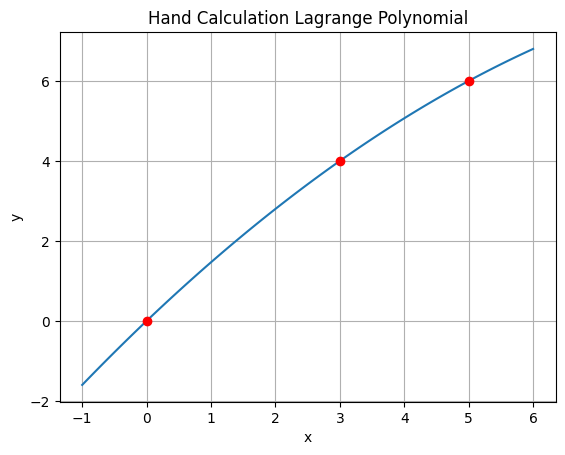

In [8]:
from scipy.interpolate import lagrange
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x=np.array([0, 3, 5]);
y=np.array([0, 4, 6]);
L = (-2/3)*(x**2-5*x) + (3/5)*(x**2-3*x)
x_new = np.arange(-1.0, 6.1, 0.1)
Lnew = (-2/3)*(x_new**2-5*x_new) + (3/5)*(x_new**2-3*x_new)
plt.plot(x_new,Lnew,x,y,'ro')
plt.title('Hand Calculation Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

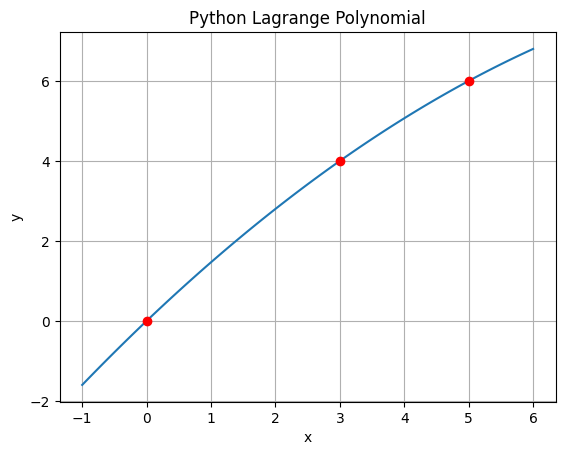

In [10]:
from scipy.interpolate import lagrange
f = lagrange(x, y)
plt.plot(x_new, f(x_new), x, y, 'ro')
plt.title('Python Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we can see the hand calculations match the python generated Lagrange polynomial interpolation.

# 17.5 Newton's Polynomial Interpolation

Newton's polynomial interpolation is a popular method for calculating because adding additional points further along do not require recalculation for the previous coefficients.

The general form looks something like this:
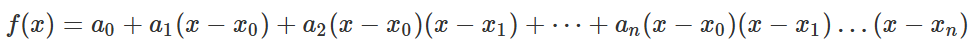

Where the coefficients are calculated using divided differences. a1 would be calculated like so:

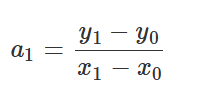

While a2 would be:

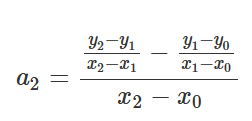

The iterative equation looks like this:

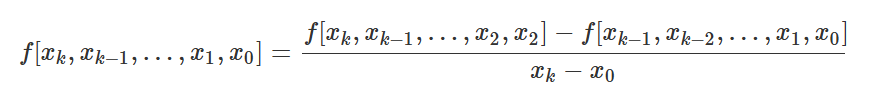

and can be solved using a diagonal matrix.

Looking at an example problem where x = [2 5 8] and y = [-3 7 1] we can use the above equation to find Newton's polynomial.

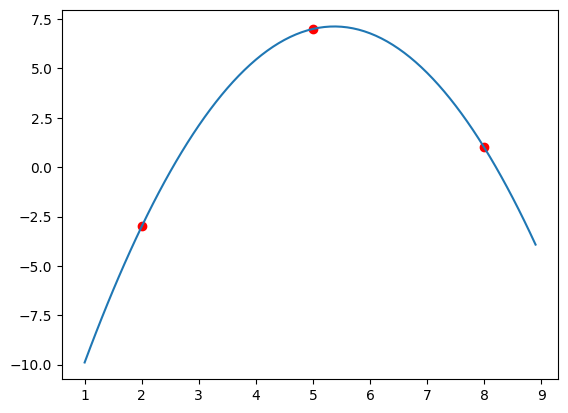

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x = np.array([2, 5, 8])
y = np.array([-3, 7, 1])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(1, 9, .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

Since the equation is defined iteratively, using a for loop to calculate each coefficient is perfect. From the graph we can see that the interpolation passes through all of the points.